** Classification of birds to species with Convolutional Neural Network**

Dataset we work with: https://www.kaggle.com/datasets/gpiosenka/100-bird-species/. Check what Convolutional neural networks are all about at https://d2l.ai/chapter_convolutional-neural-networks/index.html before making changes to this notebook.

In [40]:
# import utilities
import os
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

Training set consists of 58 388 RGB images (that means 3 channels), 224px x 224px. Validation set consists of 2000 images and test set consists of 2000 images.

In [41]:
BASE_DIR = 'C:/Users/vikto/OneDrive/Desktop/NN-projekt/K2/dataset'

TRAIN_DIR = os.path.join(BASE_DIR, 'training')
VALIDATION_DIR = os.path.join(BASE_DIR, 'validation')
TEST_DIR = os.path.join(BASE_DIR, 'testing')

In [42]:
CATEGORIES = os.listdir(TRAIN_DIR)
Category_count = len(CATEGORIES)

Augmenting training dataset because male birds are present more than female birds. This technique is one of those used to solve class imbalance. We work with a dataset through adapters, which are data generators from Tensorflow / Keras. This allows us to augment dataset as needed without need to code up this utility from scratch.

Thus I am adding here slightly different images created from existing ones to the dataset to avoid model overfitting.

In [43]:
General_datagen = ImageDataGenerator(rescale=1./255, )

Augment_datagen = ImageDataGenerator(rescale=1./255, rotation_range=60, 
    width_shift_range=0.4, 
    height_shift_range=0.4,
    zoom_range=0.1, 
    horizontal_flip=False, 
    fill_mode='nearest') 

In [44]:
train_data = Augment_datagen.flow_from_directory(TRAIN_DIR, target_size=(224,224))
Train_groups = len(train_data)

validation_data = General_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224, 224),)
Valid_groups = len(validation_data)

test_data = General_datagen.flow_from_directory(TEST_DIR, target_size=(224, 224),)
Test_groups = len(test_data)

Found 808 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


** Architecture of this Convolutional Neural Network **

1. Convolutional layer - to extract patterns and abstract from low level features of images
2. Activation layer - activation functions with a same purpose as they have in MLP
3. Pooling layer - optimization, here we use Maxpooling, goal is to try average pooling as well
4. Normalization layer - batch normalization as optimization technique. Conducted after activation, before another convolution
5. Dense layer - fully connected layer.

In [45]:
tf.keras.backend.clear_session()

IMAGE = load_img("C:/Users/vikto/OneDrive/Desktop/NN-projekt/K2/dataset/testing/ABBOTTS BABBLER/5.jpg")
IMAGEDATA = img_to_array(IMAGE)
SHAPE = IMAGEDATA.shape

model = tf.keras.models.Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=SHAPE))
model.add(Activation('tanh'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('tanh'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(Category_count)) 
model.add(Activation('softmax'))

model.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

EPOCHS = 2
BATCH_SIZE = 50

history = model.fit(train_data, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=validation_data, validation_steps=Valid_groups, verbose=1)

Epoch 1/2
26/26 [==============================] - 124s 5s/step - loss: 2.9929 - accuracy: 0.3713 - val_loss: 4.3355 - val_accuracy: 0.2000
Epoch 2/2
26/26 [==============================] - 122s 5s/step - loss: 1.4789 - accuracy: 0.4307 - val_loss: 4.5095 - val_accuracy: 0.1600


** Model Evaluation **

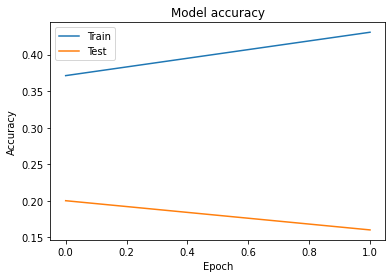

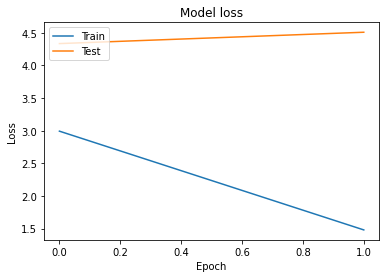

1/1 [==============================] - 1s 622ms/step - loss: 4.4424 - accuracy: 0.1600
Test loss: 4.442385673522949
Test accuracy: 0.1599999964237213


In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

scores = model.evaluate(test_data, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])